Yiting Wang 4646909520

(b) Pre-Processing and Exploratory data analysis

In [2]:
from scipy.io import arff
import numpy as np, pandas as pd

data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')       #open arff file
column_2C_weka = pd.DataFrame(data[0])                                          #data of column_2C_weka
label_column2C = [i for i in data[0]['class'].tolist()]                         #label of class

#NO=0 AB=1 
#transfer class from the string type to the int type
class_column2C= []
for j in label_column2C:                           
    if j == b'Abnormal':
        class_column2C.append(1) 
    else:
        class_column2C.append(0)
column_2C_weka['class'] = class_column2C

b(i) Make scatterplots of the independent variables in the dataset.

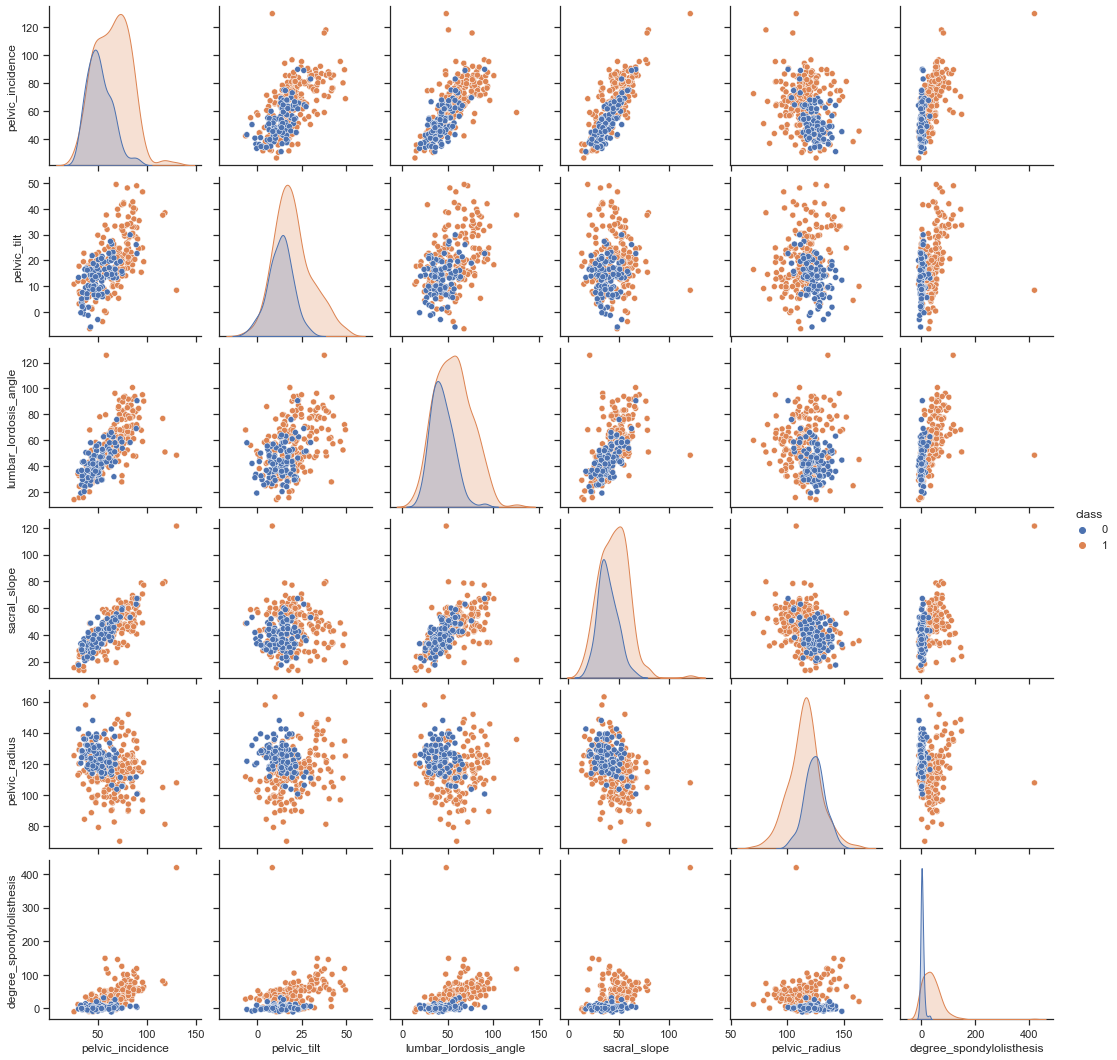

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.pairplot(column_2C_weka, hue="class")        #draw the scatterplot
plt.show()

b(ii) Make boxplots for each of the independent variables.

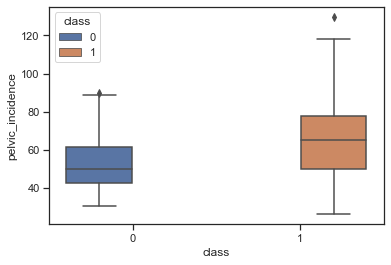

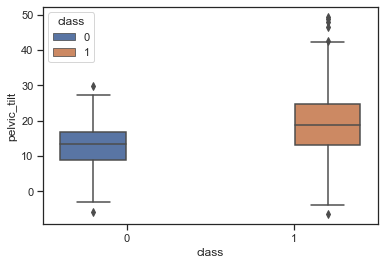

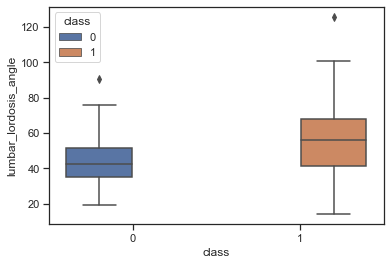

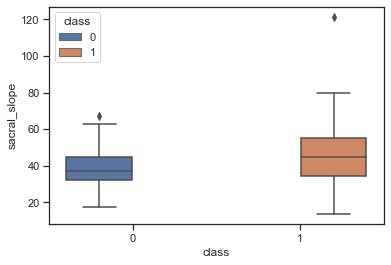

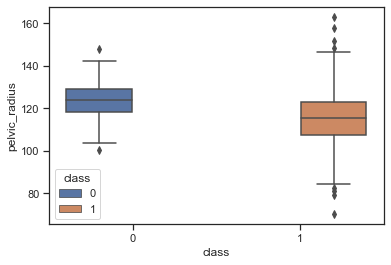

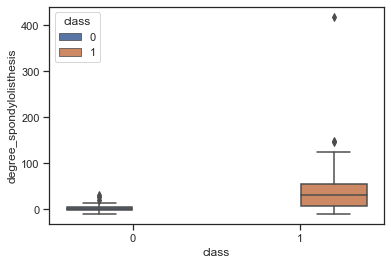

In [4]:
#Pelvic Incidence Boxes 
sns.boxplot(x='class', y='pelvic_incidence', data=column_2C_weka, hue="class")
plt.show()

#Pelvic Tilt Boxes
sns.boxplot(x='class', y='pelvic_tilt', data=column_2C_weka, hue="class")
plt.show()

#Lumbar Lordosis Angle Boxes
sns.boxplot(x='class', y='lumbar_lordosis_angle', data=column_2C_weka, hue="class")
plt.show()

#Sacral Slope
sns.boxplot(x='class', y='sacral_slope', data=column_2C_weka, hue="class")
plt.show()

#Pelvic Radius
sns.boxplot(x='class', y='pelvic_radius', data=column_2C_weka, hue="class")
plt.show()

#Grade of Spondylolisthesis
sns.boxplot(x='class', y='degree_spondylolisthesis', data=column_2C_weka, hue="class")
plt.show()

b(ii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [5]:
y_train = class_column2C[:140] + class_column2C[210:280]
y_test = class_column2C[140:210] + class_column2C[280:310]
X_train = pd.concat([column_2C_weka[:140],column_2C_weka[210:280]])
X_test = pd.concat([column_2C_weka[140:210],column_2C_weka[280:310]])

c(ii)

Lowest Training Error: 0.0


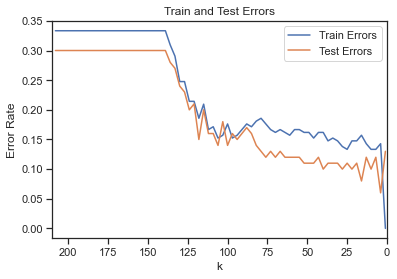

In [6]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Model to find optimal k*
def knn_modelK(k, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(X_train, y_train)
    train_error = 1 - knn.score(X_train, y_train)     #Calculate train errors
    test_error = 1 - knn.score(X_test, y_test)        #Calculate test errors
    return train_error, test_error

k = [i for i in range(208,-2,-3)]                    # k ∈ {208, 205, . . . , 7, 4, 1}
train_errorK, test_errorK= [],[]                     #Dataset of train and test errors
for i in k:   
    train_error, test_error = knn_modelK(i,X_train,y_train,X_test,y_test)
    train_errorK.append(train_error)
    test_errorK.append(test_error)

lowest_trainingError = min(train_errorK)
print('Lowest Training Error:',lowest_trainingError)


#Plot train and test errors
import matplotlib.pyplot as plt                     
plt.xlim(210,0)
plt.plot(k,train_errorK,label='Train Errors')
plt.plot(k,test_errorK,label='Test Errors')
plt.xlabel('k')
plt.ylabel('Error Rate') 
plt.title('Train and Test Errors')
plt.legend()


According to the plot, k* = 4, because when k = 4, test error is the lowest and the train error is very low.

In [7]:
from sklearn.metrics import confusion_matrix          
knn = KNeighborsClassifier(n_neighbors = 4)                #k = 4
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)                               #Predict y value use X test data

Confusion_matrix = confusion_matrix(y_test, y_pred)        #Calculate the confusion matrix
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()     #Calculate true positive rate and true negative rate
print('Confusion Matrix = ', Confusion_matrix)
print('True Positive Rate = ', round(tp*0.01,2))
print('True Negative Rate = ', tn*0.01)

from sklearn.metrics import precision_score                #Calculate the precision
Precision = round(precision_score(y_test, y_pred),2)
print('Precision = ', Precision)

from sklearn.metrics import f1_score                       ##Calculate the F1 score
F1_score = round(f1_score(y_test, y_pred),2)
print('F1 Score = ', F1_score)

Confusion Matrix =  [[25  5]
 [ 1 69]]
True Positive Rate =  0.69
True Negative Rate =  0.25
Precision =  0.93
F1 Score =  0.96


(c)iii

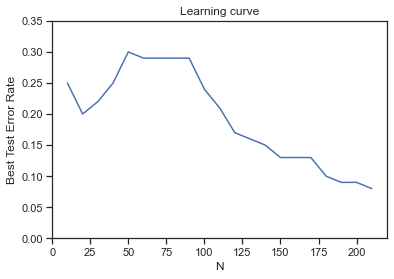

In [8]:
#Class 0 [N/3]   Class 1 N - [N/3]
import math

#Create KNN Model to find learning curve
def knnModel_LearningCurve(N, knn_model_X, knn_model_y, y_test, X_test):       
    N_3 = math.floor(N/3)                                 #[N/3]
    y_train = knn_model_y[:N-N_3] + knn_model_y[210:210+N_3]
    X_train = pd.concat([knn_model_X[:N-N_3],knn_model_X[210:210+N_3]])
    
    best_rate = 1                                         #Define best test rate
    for i in range(1,N,5):
        train_error, test_error = knn_modelK(i,X_train,y_train,X_test,y_test)
        if test_error < best_rate:                    
            best_rate = test_error                        #Find best test rate
    return best_rate


N = [n for n in range(10,220,10)]                         #N ∈ {10, 20, 30, . . . , 210}
best_rate = []                                            #Datasets of optimal k and best test rate
for n in N:
    best_rate.append(knnModel_LearningCurve(n,column_2C_weka,class_column2C,y_test, X_test))


import matplotlib.pyplot as plt
#Plot learning curve
plt.xlim(0,220)
plt.ylim(0,0.35)
plt.plot(N, best_rate) 
plt.xlabel('N')
plt.ylabel('Best Test Error Rate') 
plt.title('Learning curve')
plt.show()

d(i)A Manhattan Distance with p = 1

Manhattan Distance:
Best test error =  0.09
Best k =  6


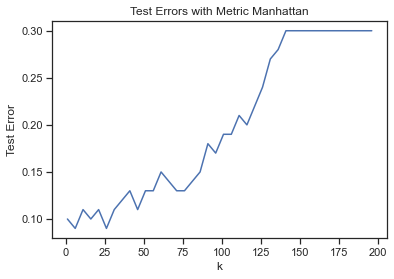

In [9]:
#Create KNN Model with changeable metric and weights
def knnModel_Change(k, knn_metric, X_train, y_train, X_test, y_test, knn_p = None, knn_v = None, knn_weights ='uniform'):
    knn = KNeighborsClassifier(n_neighbors = k, metric = knn_metric, p = knn_p, metric_params = knn_v, weights = knn_weights)  
    knn.fit(X_train, y_train)
    test_error = 1 - knn.score(X_test, y_test)                 #Calculate test errors
    return test_error

k = [i for i in range(1,201,5)]                                #k ∈ {1, 6, 11, . . . , 196}.
testError_Manhattan = []                                       #Dataset of test error with Manhattan Distance
best_Manhattan = k_Manhattan = 1                               #Best test error and best k with Manhattan Distance
for i in k:   
    testError = knnModel_Change(i,'manhattan', X_train,y_train,X_test,y_test)
    testError_Manhattan.append(testError)
    if testError < best_Manhattan:
        best_Manhattan = testError
        k_Manhattan = i

print('Manhattan Distance:')
print('Best test error = ', round(best_Manhattan,2))
print('Best k = ', k_Manhattan)

import matplotlib.pyplot as plt
plt.plot(k, testError_Manhattan) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Metric Manhattan')
plt.show()

d(i)B Minkowski Distance
k* = 6 from d(i)A Manhattan Distance.

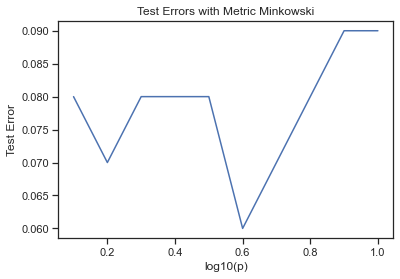

In [10]:
testError_Minkowski = []                              #Dataset of test error with Minkowski Distance
for j in np.linspace(0.1,1,10):  
    p = pow(10,j)                                     #log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}
    testError_Minkowski.append(knnModel_Change(6,'minkowski',X_train,y_train,X_test,y_test,knn_p = p))

import matplotlib.pyplot as plt
#Plot the best test error rate
plt.plot(np.linspace(0.1,1,10), testError_Minkowski) 
plt.xlabel('log10(p)')
plt.ylabel('Test Error') 
plt.title('Test Errors with Metric Minkowski')
plt.show()

Best log10(p) = 0.6

d(i)C Chebyshev Distance

Chebyshev Distance:
Best test error =  0.08
Best k =  16


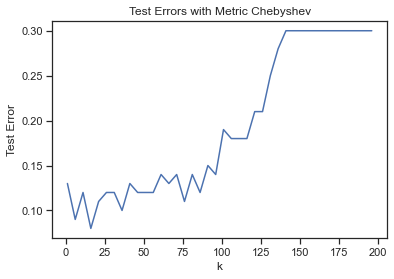

In [11]:
testError_Chebyshev = []                                      #Dataset of test error with Manhattan Distance
best_Chebyshev = k_Chebyshev = 1                                      #Best test error and best k
for i in k:  
    testError = knnModel_Change(i,'chebyshev', X_train,y_train,X_test,y_test)
    testError_Chebyshev.append(testError)
    if testError < best_Chebyshev:
        best_Chebyshev = testError
        k_Chebyshev = i

print('Chebyshev Distance:')
print('Best test error = ', round(best_Chebyshev,2))
print('Best k = ', k_Chebyshev)

import matplotlib.pyplot as plt
plt.plot(k, testError_Chebyshev) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Metric Chebyshev')
plt.show()

d(ii) Mahalanobis Distance

Mahalanobis Distance:
Best test error =  0.08
Best k =  6


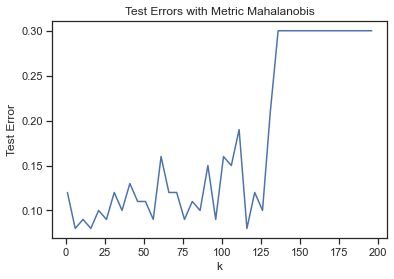

In [12]:
testError_Mahalanobis = []                            #Dataset of test error with Mahalanobis Distance
best_Mahalanobis = k_Mahalanobis = 1                  #Best test error and best k with Mahalanobis Distance
for i in k:   
    testError = knnModel_Change(i,'mahalanobis',X_train,y_train,X_test,y_test,knn_v={'VI':np.cov(X_train.T)})
    testError_Mahalanobis.append(testError)
    if testError < best_Mahalanobis:
        best_Mahalanobis = testError
        k_Mahalanobis = i
        
print('Mahalanobis Distance:')
print('Best test error = ', round(best_Mahalanobis,2))
print('Best k = ', k_Mahalanobis)
        
import matplotlib.pyplot as plt
plt.plot(k, testError_Mahalanobis) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Metric Mahalanobis')
plt.show()

e

Weighted Euclidean Distance:
Best test error =  0.1


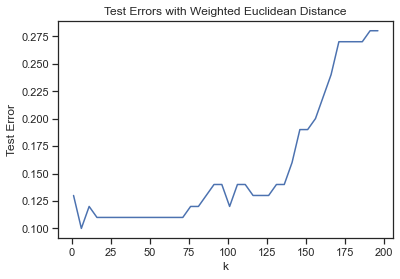

In [13]:
#Euclidean Distance
weighted_Euclidean = []                               #Dataset of test error with weighted Euclidean Distance
best_weighted_Euclidean = 1                           #Best test error with weighted Euclidean Distance
for i in k:   
    testError = knnModel_Change(i,'euclidean',X_train,y_train,X_test,y_test,knn_weights ='distance')
    weighted_Euclidean.append(testError)
    if testError < best_weighted_Euclidean:
        best_weighted_Euclidean = testError
        
print('Weighted Euclidean Distance:')
print('Best test error = ', round(best_weighted_Euclidean,2))

import matplotlib.pyplot as plt
plt.plot(k, weighted_Euclidean) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Weighted Euclidean Distance')
plt.show()

Weighted Manhattan Distance:
Best test error =  0.08


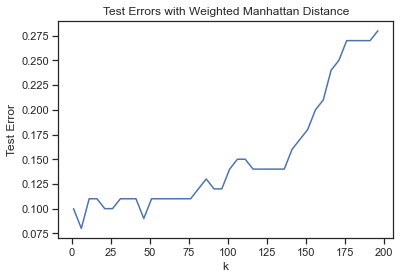

In [14]:
#Manhattan Distance
weighted_Manhattan = []                             #Dataset of test error with weighted Manhattan Distance
best_weighted_Manhattan = 1                         #Best test error with weighted Manhattan Distance

for i in k:   
    testError = knnModel_Change(i,'manhattan',X_train,y_train,X_test,y_test,knn_weights ='distance')
    weighted_Manhattan.append(testError)
    if testError < best_weighted_Manhattan:
        best_weighted_Manhattan = testError

print('Weighted Manhattan Distance:')
print('Best test error = ', round(best_weighted_Manhattan,2))

import matplotlib.pyplot as plt
plt.plot(k, weighted_Manhattan) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Weighted Manhattan Distance')
plt.show()

Weighted Chebyshev Distance:
Best test error =  0.11


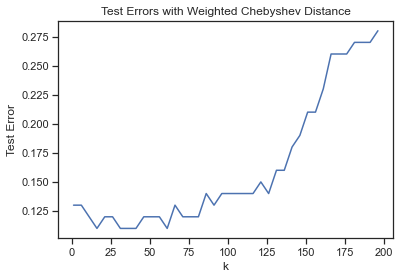

In [15]:
#Chebyshev Distance
weighted_Chebyshev = []                             #Dataset of test error with weighted Chebyshev Distance
best_weighted_Chebyshev = 1                         #Best test error with weighted Chebyshev Distance
for i in k:   
    testError = knnModel_Change(i,'chebyshev',X_train,y_train,X_test,y_test,knn_weights ='distance')
    weighted_Chebyshev.append(testError)
    if testError < best_weighted_Chebyshev:
        best_weighted_Chebyshev = testError

print('Weighted Chebyshev Distance:')
print('Best test error = ', round(best_weighted_Chebyshev,2))

import matplotlib.pyplot as plt
plt.plot(k, weighted_Chebyshev) 
plt.xlabel('k')
plt.ylabel('Test Error') 
plt.title('Test Errors with Weighted Chebyshev Distance')
plt.show()

(f) The lowest training error is 0 when k = 1.